## First Trials

This data used input vectors of 16384 floats and mapped the results to a vector of 12228 for each thread block. ** need to verify

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ----- Load the data -----
dataPath = '../Data/saxpyData/realMaxTests/'

# First experiment
no_shared1 = pd.read_csv(dataPath+'saxpyMax1.csv')
shared1 = pd.read_csv(dataPath+'saxpyMaxShared1.csv')

# rename cols
no_shared1.columns = ['start', 'end']
shared1.columns = ['start', 'end']

# interval column
no_shared1['interval'] = no_shared1['end'] - no_shared1['start']
shared1['interval'] = shared1['end'] - shared1['start']

# Second experiment
no_shared2 = pd.read_csv(dataPath+'saxpyMax2.csv')
shared2 = pd.read_csv(dataPath+'saxpyMaxShared2.csv')

# rename cols
no_shared2.columns = ['start', 'end']
shared2.columns = ['start', 'end']

# interval column
no_shared2['interval'] = no_shared2['end'] - no_shared2['start']
shared2['interval'] = shared2['end'] - shared2['start']

# Third experiment
no_shared3 = pd.read_csv(dataPath+'saxpyMax3.csv')
shared3 = pd.read_csv(dataPath+'saxpyMaxShared3.csv')

# rename cols
no_shared3.columns = ['start', 'end']
shared3.columns = ['start', 'end']

# interval column
no_shared3['interval'] = no_shared3['end'] - no_shared3['start']
shared3['interval'] = shared3['end'] - shared3['start']


# ----- Accumulate all intervals -----
import numpy as np

# Rescale to microseconds
all_ivls = (no_shared1['interval']/1000).to_list() + (no_shared2['interval']/1000).to_list() + (no_shared3['interval']/1000).to_list()
all_ivls_shared = (shared1['interval']/1000).to_list() + (shared2['interval']/1000).to_list() + (shared3['interval']/1000).to_list()

# ----- Get 5-number distribution summary -----
sum_no_shared =  np.percentile(all_ivls, [0, 25, 50, 75, 100], method='midpoint')

# Print the 5-number summaries
print('No Shared Memory:\n-----------------')
print("Minimum:", sum_no_shared[0])
print("Q1:", sum_no_shared[1])
print("Median:", sum_no_shared[2])
print("Q3:", sum_no_shared[3])
print("Maximum:", sum_no_shared[4])
print('-----------------\n')

print('Shared Memory:\n-----------------')
sum_shared = np.percentile(all_ivls_shared, [0, 25, 50, 75, 100], method='midpoint')
print("Minimum:", sum_shared[0])
print("Q1:", sum_shared[1])
print("Median:", sum_shared[2])
print("Q3:", sum_shared[3])
print("Maximum:", sum_shared[4])
print('-----------------')

No Shared Memory:
-----------------
Minimum: 1014.858
Q1: 1014.886
Median: 1015.893
Q3: 1015.91
Maximum: 5122.478
-----------------

Shared Memory:
-----------------
Minimum: 1014.883
Q1: 1014.889
Median: 1015.91
Q3: 1015.913
Maximum: 5122.566
-----------------


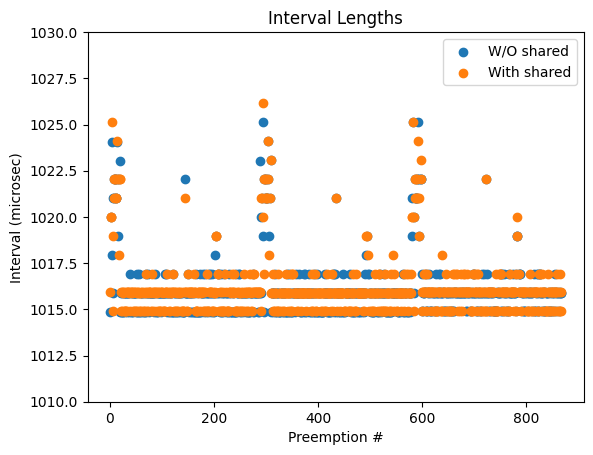

In [9]:

# ----- Plot the data -----
NUM_SAMPLES = 290

# Plot all intervals
plt.scatter(range(1, NUM_SAMPLES*3-2), all_ivls, label='W/O shared')
plt.scatter(range(1, NUM_SAMPLES*3-2), all_ivls_shared, label='With shared')

# Add labels and title
plt.xlabel('Preemption #')
plt.ylabel('Interval (microsec)')
plt.title('Interval Lengths')

# Add legend
plt.legend()

# Set y-axis limits
plt.ylim(1.01*1e3, 1.03*1e3)

# Show the plot
plt.show()